In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager,rc
mpl.rcParams['axes.unicode_minus']=False
font_path='C:/Users/user/AppData/Local/Microsoft/Windows/Fonts/JalnanOTF.otf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font_name)
import seaborn as sns

In [10]:
pip install folium

In [11]:
import folium

In [2]:
df=pd.read_excel("data/2023.1월_29개 통신정보.xlsx")
df.head

<bound method NDFrame.head of          행정동코드  자치구  행정동  성별  연령대     총인구수   1인가구수  야간상주지 변경 미추정 인구 수  \
0      1101053  종로구  사직동   1   20   221.44   53.98                  0   
1      1101053  종로구  사직동   1   25   321.00  107.77                  0   
2      1101053  종로구  사직동   1   30   349.00  117.23                  0   
3      1101053  종로구  사직동   1   35   353.00  110.58                  0   
4      1101053  종로구  사직동   1   40   420.00   79.58                  0   
...        ...  ...  ...  ..  ...      ...     ...                ...   
10171  1125074  강동구   길동   2   55  2285.92  293.82                  0   
10172  1125074  강동구   길동   2   60  1578.67  217.60                  0   
10173  1125074  강동구   길동   2   65  1085.18  187.50                  0   
10174  1125074  강동구   길동   2   70   816.81  131.71                  0   
10175  1125074  강동구   길동   2   75   974.77  384.07                  0   

       야간상주지 변경횟수 평균  야간상주지 변경횟수: 4분위수, 25%  ...  배달_브랜드 서비스 사용 미추정 인구수  \
0               2.

In [13]:
df=df.set_index(['자치구'])
df

,행정동코드,행정동,성별,연령대,총인구수,1인가구수,야간상주지 변경 미추정 인구 수,야간상주지 변경횟수 평균,"야간상주지 변경횟수: 4분위수, 25%","야간상주지 변경횟수: 4분위수, 50%",...,배달_브랜드 서비스 사용 미추정 인구수,배달_브랜드 서비스 사용일수,"배달_브랜드 서비스 사용일수: 4분위수, 25%","배달_브랜드 서비스 사용일수: 4분위수, 50%","배달_브랜드 서비스 사용일수: 4분위수, 75%",배달_식재료 서비스 사용 미추정 인구수,배달_식재료 서비스 사용일수,"배달_식재료 서비스 사용일수: 4분위수, 25%","배달_식재료 서비스 사용일수: 4분위수, 50%","배달_식재료 서비스 사용일수: 4분위수, 75%"
자치구,,,,,,,,,,,,,,,,,,,,,
종로구,1101053,사직동,1,20,221.44,53.98,0,2.44,1,2,...,200.97,2.71,1.67,1.67,3.33,221.44,0.00,0.00,0.00,0.00
종로구,1101053,사직동,1,25,321.00,107.77,0,2.29,1,2,...,259.18,2.88,1.67,1.67,3.33,316.24,1.67,1.67,1.67,1.67
종로구,1101053,사직동,1,30,349.00,117.23,0,1.96,1,2,...,298.29,3.33,1.67,3.33,5.00,341.54,1.67,1.67,1.67,1.67
종로구,1101053,사직동,1,35,353.00,110.58,0,1.99,1,2,...,291.61,3.06,1.67,1.67,5.00,344.47,1.67,1.67,1.67,1.67
종로구,1101053,사직동,1,40,420.00,79.58,0,1.75,1,1,...,378.13,2.83,1.67,1.67,5.00,412.57,1.67,1.67,1.67,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
강동구,1125074,길동,2,55,2285.92,293.82,0,1.48,1,1,...,2238.30,2.60,1.67,1.67,3.33,2246.70,1.67,1.67,1.67,1.67
강동구,1125074,길동,2,60,1578.67,217.60,0,1.45,1,1,...,1567.20,2.86,1.67,1.67,5.00,1568.84,1.67,1.67,1.67,1.67
강동구,1125074,길동,2,65,1085.18,187.50,0,1.49,1,1,...,1079.18,2.00,1.67,1.67,1.67,1080.38,1.67,1.67,1.67,1.67


In [14]:
df.dtypes

행정동코드                           int64
행정동                            object
성별                              int64
연령대                             int64
총인구수                          float64
                               ...   
배달_식재료 서비스 사용 미추정 인구수         float64
배달_식재료 서비스 사용일수               float64
배달_식재료 서비스 사용일수: 4분위수, 25%    float64
배달_식재료 서비스 사용일수: 4분위수, 50%    float64
배달_식재료 서비스 사용일수: 4분위수, 75%    float64
Length: 142, dtype: object

In [15]:
x=['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구']

In [16]:
w=[]
for i in x:
    a=(df.index==i) & (df['연령대']<40)
    df20=df[a]
    df20=df20.loc[[i], ['배달 서비스 사용일수', '배달_브랜드 서비스 사용일수', '총인구수', '1인가구수']]
    w.append(df20.sum())
df20 = pd.DataFrame(w, index=x)
df20

,배달 서비스 사용일수,배달_브랜드 서비스 사용일수,총인구수,1인가구수
종로구,2269.18,375.06,51798.36,18223.66
중구,2172.14,318.89,42558.59,13890.10
용산구,2181.53,337.13,72183.09,21809.63
성동구,2349.21,354.69,98422.09,24069.60
광진구,2182.73,321.94,130205.87,42236.29
동대문구,2031.19,297.76,121071.42,37610.36
중랑구,2346.12,338.31,122317.56,20628.62
성북구,2790.25,421.95,143611.00,34233.25
강북구,1951.34,274.80,90669.93,16144.31
도봉구,1974.17,298.26,95160.07,10205.94


In [17]:
df20['1인당 배달 서비스 사용일수']=df20['배달_브랜드 서비스 사용일수']/df20['총인구수']
df20['1인당 배달_브랜드 서비스 사용일수']=df20['배달_브랜드 서비스 사용일수']/df20['총인구수']
df20['1인가구수 비율']=df20['1인가구수']/df20['총인구수']
df20

,배달 서비스 사용일수,배달_브랜드 서비스 사용일수,총인구수,1인가구수,1인당 배달 서비스 사용일수,1인당 배달_브랜드 서비스 사용일수,1인가구수 비율
종로구,2269.18,375.06,51798.36,18223.66,0.007241,0.007241,0.351819
중구,2172.14,318.89,42558.59,13890.10,0.007493,0.007493,0.326376
용산구,2181.53,337.13,72183.09,21809.63,0.004670,0.004670,0.302143
성동구,2349.21,354.69,98422.09,24069.60,0.003604,0.003604,0.244555
광진구,2182.73,321.94,130205.87,42236.29,0.002473,0.002473,0.324381
동대문구,2031.19,297.76,121071.42,37610.36,0.002459,0.002459,0.310646
중랑구,2346.12,338.31,122317.56,20628.62,0.002766,0.002766,0.168648
성북구,2790.25,421.95,143611.00,34233.25,0.002938,0.002938,0.238375
강북구,1951.34,274.80,90669.93,16144.31,0.003031,0.003031,0.178056
도봉구,1974.17,298.26,95160.07,10205.94,0.003134,0.003134,0.107250


In [18]:
df20.corr()

,배달 서비스 사용일수,배달_브랜드 서비스 사용일수,총인구수,1인가구수,1인당 배달 서비스 사용일수,1인당 배달_브랜드 서비스 사용일수,1인가구수 비율
배달 서비스 사용일수,1.000000,0.980709,0.729409,0.522527,-0.112136,-0.112136,0.076814
배달_브랜드 서비스 사용일수,0.980709,1.000000,0.702406,0.460259,-0.073547,-0.073547,0.042651
총인구수,0.729409,0.702406,1.000000,0.678217,-0.714078,-0.714078,-0.049926
1인가구수,0.522527,0.460259,0.678217,1.000000,-0.389771,-0.389771,0.666766
1인당 배달 서비스 사용일수,-0.112136,-0.073547,-0.714078,-0.389771,1.000000,1.000000,0.275844
1인당 배달_브랜드 서비스 사용일수,-0.112136,-0.073547,-0.714078,-0.389771,1.000000,1.000000,0.275844
1인가구수 비율,0.076814,0.042651,-0.049926,0.666766,0.275844,0.275844,1.000000


In [19]:
w=[]
for i in x:
    a=(df.index==i) & (df['연령대']<60) & (df['연령대']>35)
    df40=df[a]
    df40=df40.loc[[i], ['배달 서비스 사용일수', '배달_브랜드 서비스 사용일수', '총인구수', '1인가구수']]
    w.append(df40.sum())
df40 = pd.DataFrame(w, index=x)
df40

,배달 서비스 사용일수,배달_브랜드 서비스 사용일수,총인구수,1인가구수
종로구,1684.69,367.60,52594.00,8795.48
중구,1586.05,312.13,43215.92,8388.73
용산구,1608.19,348.65,74475.00,11606.54
성동구,1726.22,373.24,97064.11,12642.08
광진구,1570.59,325.69,118858.64,17576.68
동대문구,1483.11,309.43,111697.45,14461.40
중랑구,1673.68,352.92,137098.15,20887.12
성북구,2079.46,431.43,144767.01,14796.32
강북구,1413.23,284.91,106361.70,14983.78
도봉구,1482.92,302.04,116160.30,12388.66


In [21]:
df60['1인당 휴일 총 이동 거리']=df60['휴일 총 이동 거리 합계']/df60['총인구수']
df60['1인당 평균 통화대상자 수']=df60['평균 통화대상자 수']/df60['총인구수']
df60['1인당 휴일 총 이동 횟수']=df60['휴일 총 이동 횟수 평균']/df60['총인구수']
df60

,휴일 총 이동 거리 합계,평균 통화대상자 수,휴일 총 이동 횟수 평균,총인구수,1인가구수,1인당 휴일 총 이동 거리,1인당 평균 통화대상자 수,1인당 휴일 총 이동 횟수
종로구,30537.10,1860.68,769.67,31831.65,8235.42,0.959331,0.058454,0.024179
중구,26627.24,1682.74,667.33,26653.71,7020.87,0.999007,0.063133,0.025037
용산구,29479.61,1749.76,738.76,44575.54,10142.99,0.661341,0.039254,0.016573
성동구,30326.97,1790.75,750.22,53383.21,11055.09,0.568099,0.033545,0.014053
광진구,27820.14,1594.54,675.50,59066.14,12276.50,0.471000,0.026996,0.011436
동대문구,24571.88,1448.36,603.59,71498.82,16339.83,0.343668,0.020257,0.008442
중랑구,28025.62,1606.12,694.36,77778.98,18445.88,0.360324,0.020650,0.008927
성북구,34439.84,2036.42,877.26,85546.01,16820.95,0.402589,0.023805,0.010255
강북구,21273.29,1250.60,564.08,71245.67,17375.54,0.298591,0.017553,0.007917
도봉구,24152.96,1384.54,613.64,68561.34,14513.08,0.352282,0.020194,0.008950


In [22]:
corr=df60.corr()
corr

,휴일 총 이동 거리 합계,평균 통화대상자 수,휴일 총 이동 횟수 평균,총인구수,1인가구수,1인당 휴일 총 이동 거리,1인당 평균 통화대상자 수,1인당 휴일 총 이동 횟수
휴일 총 이동 거리 합계,1.000000,0.990060,0.987291,0.576307,0.267748,0.093517,0.061712,0.070908
평균 통화대상자 수,0.990060,1.000000,0.991282,0.501862,0.187824,0.185066,0.158461,0.168259
휴일 총 이동 횟수 평균,0.987291,0.991282,1.000000,0.566936,0.253414,0.104623,0.078686,0.093973
총인구수,0.576307,0.501862,0.566936,1.000000,0.869038,-0.704452,-0.714935,-0.712100
1인가구수,0.267748,0.187824,0.253414,0.869038,1.000000,-0.715909,-0.717018,-0.719751
1인당 휴일 총 이동 거리,0.093517,0.185066,0.104623,-0.704452,-0.715909,1.000000,0.997917,0.996942
1인당 평균 통화대상자 수,0.061712,0.158461,0.078686,-0.714935,-0.717018,0.997917,1.000000,0.998177
1인당 휴일 총 이동 횟수,0.070908,0.168259,0.093973,-0.712100,-0.719751,0.996942,0.998177,1.000000


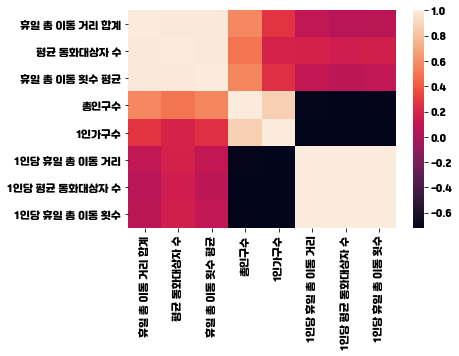

In [23]:
sns.heatmap(corr)
plt.show()

In [24]:
a=[]
for i in x:
    k=df.loc[[i], ['배달 서비스 사용일수', '배달_브랜드 서비스 사용일수', '총인구수', '1인가구수']]
    m=k.sum()
    a.append(m)
dfa = pd.DataFrame(a, index=x)
a

[배달 서비스 사용일수          5090.47
 배달_브랜드 서비스 사용일수       888.25
 총인구수               136224.01
 1인가구수               35254.56
 dtype: float64,
 배달 서비스 사용일수          4858.33
 배달_브랜드 서비스 사용일수       769.77
 총인구수               112428.22
 1인가구수               29299.70
 dtype: float64,
 배달 서비스 사용일수          4854.18
 배달_브랜드 서비스 사용일수       876.15
 총인구수               191233.63
 1인가구수               43559.16
 dtype: float64,
 배달 서비스 사용일수          5188.35
 배달_브랜드 서비스 사용일수       902.85
 총인구수               248869.41
 1인가구수               47766.77
 dtype: float64,
 배달 서비스 사용일수          4875.65
 배달_브랜드 서비스 사용일수       866.66
 총인구수               308130.65
 1인가구수               72089.47
 dtype: float64,
 배달 서비스 사용일수          4550.07
 배달_브랜드 서비스 사용일수       823.30
 총인구수               304267.69
 1인가구수               68411.59
 dtype: float64,
 배달 서비스 사용일수          5340.99
 배달_브랜드 서비스 사용일수       906.20
 총인구수               337194.69
 1인가구수               59961.62
 dtype: float64,
 배달 서비스 사용일수          6372.51
 배달_브랜드 서비스

In [25]:
dfa['1인가구수 비율']=dfa['1인가구수']/dfa['총인구수']
dfa

,배달 서비스 사용일수,배달_브랜드 서비스 사용일수,총인구수,1인가구수,1인가구수 비율
종로구,5090.47,888.25,136224.01,35254.56,0.258798
중구,4858.33,769.77,112428.22,29299.70,0.260608
용산구,4854.18,876.15,191233.63,43559.16,0.227780
성동구,5188.35,902.85,248869.41,47766.77,0.191935
광진구,4875.65,866.66,308130.65,72089.47,0.233957
동대문구,4550.07,823.30,304267.69,68411.59,0.224840
중랑구,5340.99,906.20,337194.69,59961.62,0.177825
성북구,6372.51,1112.64,373924.02,65850.52,0.176107
강북구,4346.39,750.90,268277.30,48503.63,0.180797
도봉구,4528.05,814.45,279881.71,37107.68,0.132583


In [26]:
corr = dfa.corr()
corr

,배달 서비스 사용일수,배달_브랜드 서비스 사용일수,총인구수,1인가구수,1인가구수 비율
배달 서비스 사용일수,1.000000,0.959945,0.716403,0.604056,-0.051837
배달_브랜드 서비스 사용일수,0.959945,1.000000,0.794259,0.565084,-0.203913
총인구수,0.716403,0.794259,1.000000,0.695928,-0.396296
1인가구수,0.604056,0.565084,0.695928,1.000000,0.354681
1인가구수 비율,-0.051837,-0.203913,-0.396296,0.354681,1.000000


In [27]:
df2=pd.read_csv('data/주민등록인구.csv')
df2=df2.set_index('동별(2)')
df2

,동별(1),2022 3/4,2022 3/4.1,2022 3/4.2,2022 3/4.3,2022 3/4.4,2022 3/4.5,2022 4/4,2022 4/4.1,2022 4/4.2,2022 4/4.3,2022 4/4.4,2022 4/4.5
동별(2),,,,,,,,,,,,,
동별(2),동별(1),세대 (세대),계,한국인,등록외국인,세대당인구,65세이상고령자,세대 (세대),계,한국인,등록외국인,세대당인구,65세이상고령자
소계,합계,4450525,9682126,9450768,231358,2.12,1650367,4446296,9667669,9428372,239297,2.12,1667411
종로구,합계,72797,151999,141978,10021,1.95,27787,72524,152211,141379,10832,1.95,27958
중구,합계,63300,130764,120969,9795,1.91,24841,63139,130785,120437,10348,1.91,25055
용산구,합계,109954,233734,219275,14459,1.99,38784,109805,233284,218650,14634,1.99,39037
성동구,합계,133819,288941,282250,6691,2.11,47347,133305,288234,281000,7234,2.11,47720
광진구,합계,169338,351073,338257,12816,2.00,53405,169291,351252,337416,13836,1.99,54071
동대문구,합계,170068,353181,337106,16075,1.98,63807,169873,353601,336644,16957,1.98,64468
중랑구,합계,187513,391110,386390,4720,2.06,74112,187413,390140,385318,4822,2.06,74920


In [28]:
df2=df2.iloc[2:, 2:3]
df2.columns=['인구']
df2['인구']=df2['인구'].astype(int)
df2

,인구
동별(2),
종로구,151999
중구,130764
용산구,233734
성동구,288941
광진구,351073
동대문구,353181
중랑구,391110
성북구,442596
강북구,298622


In [29]:
dfa['인구']=df2['인구']
dfa['배달 서비스 사용일수']=dfa['배달 서비스 사용일수']/dfa['인구']
dfa['배달_브랜드 서비스 사용일수']=dfa['배달_브랜드 서비스 사용일수']/dfa['인구']
dfa

,배달 서비스 사용일수,배달_브랜드 서비스 사용일수,총인구수,1인가구수,1인가구수 비율,인구
종로구,0.033490,0.005844,136224.01,35254.56,0.258798,151999
중구,0.037153,0.005887,112428.22,29299.70,0.260608,130764
용산구,0.020768,0.003748,191233.63,43559.16,0.227780,233734
성동구,0.017956,0.003125,248869.41,47766.77,0.191935,288941
광진구,0.013888,0.002469,308130.65,72089.47,0.233957,351073
동대문구,0.012883,0.002331,304267.69,68411.59,0.224840,353181
중랑구,0.013656,0.002317,337194.69,59961.62,0.177825,391110
성북구,0.014398,0.002514,373924.02,65850.52,0.176107,442596
강북구,0.014555,0.002515,268277.30,48503.63,0.180797,298622
도봉구,0.014380,0.002587,279881.71,37107.68,0.132583,314884


In [30]:
corr = dfa.corr()
corr

,배달 서비스 사용일수,배달_브랜드 서비스 사용일수,총인구수,1인가구수,1인가구수 비율,인구
배달 서비스 사용일수,1.000000,0.990964,-0.740517,-0.446195,0.513896,-0.722796
배달_브랜드 서비스 사용일수,0.990964,1.000000,-0.723027,-0.456977,0.483993,-0.699127
총인구수,-0.740517,-0.723027,1.000000,0.695928,-0.396296,0.991497
1인가구수,-0.446195,-0.456977,0.695928,1.000000,0.354681,0.653060
1인가구수 비율,0.513896,0.483993,-0.396296,0.354681,1.000000,-0.427255
인구,-0.722796,-0.699127,0.991497,0.653060,-0.427255,1.000000


In [31]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
m20 = folium.Map(location=[37.562225, 126.978555], tiles="openstreetmap", zoom_start=11)

m20.choropleth(
    geo_data=state_geo,
    name='지역내총생산',
    data=df20['1인가구수'],
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'red',
    legend_name = '1인가구수'
)
m20

C:\Users\user\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [58]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
m40 = folium.Map(location=[37.562225, 126.978555], tiles="openstreetmap", zoom_start=11)

m40.choropleth(
    geo_data=state_geo,
    name='지역내총생산',
    data=df40['1인가구수'],
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'red',
    legend_name = '1인가구수'
)
m40

In [59]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
m60 = folium.Map(location=[37.562225, 126.978555], tiles="openstreetmap", zoom_start=11)

m60.choropleth(
    geo_data=state_geo,
    name='지역내총생산',
    data=df60['1인가구수'],
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'red',
    legend_name = '1인가구수'
)
m60

In [32]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
m1 = folium.Map(location=[37.562225, 126.978555], tiles="openstreetmap", zoom_start=11)

m1.choropleth(
    geo_data=state_geo,
    name='지역내총생산',
    data=dfa['배달 서비스 사용일수'],
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'red',
    legend_name = '배달 서비스 사용일수'
)
m1

In [33]:
m2 = folium.Map(location=[37.562225, 126.978555], zoom_start=11)

m2.choropleth(
    geo_data=state_geo,
    name='배달_브랜드 서비스 사용일수',
    data=dfa['배달_브랜드 서비스 사용일수'],
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'red',
    legend_name = '배달_브랜드 서비스 사용일수'
)
m2

In [34]:
a=[]
for i in x:
    k=df.loc[[i], ['휴일 총 이동 거리 합계', '평균 통화대상자 수', '휴일 총 이동 횟수 평균']]
    m=k.sum()
    a.append(m)
dfb = pd.DataFrame(a, index=x)
dfb

,휴일 총 이동 거리 합계,평균 통화대상자 수,휴일 총 이동 횟수 평균
종로구,107903.47,5754.43,2615.04
중구,98004.65,5283.22,2302.93
용산구,105324.52,5574.20,2578.75
성동구,109130.12,5736.63,2627.82
광진구,96803.34,4945.53,2325.60
동대문구,86685.19,4606.85,2106.22
중랑구,98172.54,5150.73,2439.26
성북구,121759.49,6536.27,3041.56
강북구,75313.33,4039.03,1965.07
도봉구,83631.08,4410.49,2143.41


In [35]:
dfb['인구']=dfa['총인구수']
dfb['휴일 총 이동 거리 합계']=dfb['휴일 총 이동 거리 합계']/dfb['인구']
dfb['평균 통화대상자 수']=dfb['평균 통화대상자 수']/dfb['인구']
dfb['휴일 총 이동 횟수 평균']=dfb['휴일 총 이동 횟수 평균']/dfb['인구']
dfb

,휴일 총 이동 거리 합계,평균 통화대상자 수,휴일 총 이동 횟수 평균,인구
종로구,0.792103,0.042242,0.019197,136224.01
중구,0.871709,0.046992,0.020484,112428.22
용산구,0.550764,0.029149,0.013485,191233.63
성동구,0.438504,0.023051,0.010559,248869.41
광진구,0.314163,0.016050,0.007547,308130.65
동대문구,0.284898,0.015141,0.006922,304267.69
중랑구,0.291145,0.015275,0.007234,337194.69
성북구,0.325626,0.017480,0.008134,373924.02
강북구,0.280729,0.015055,0.007325,268277.30
도봉구,0.298809,0.015758,0.007658,279881.71


In [36]:
dfb.corr()

,휴일 총 이동 거리 합계,평균 통화대상자 수,휴일 총 이동 횟수 평균,인구
휴일 총 이동 거리 합계,1.000000,0.998373,0.996685,-0.687936
평균 통화대상자 수,0.998373,1.000000,0.998752,-0.700631
휴일 총 이동 횟수 평균,0.996685,0.998752,1.000000,-0.703152
인구,-0.687936,-0.700631,-0.703152,1.000000


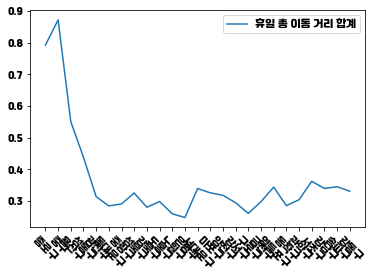

In [37]:
plt.xticks(rotation = -45)
plt.tick_params(axis='x')
plt.plot(dfb.index , dfb['휴일 총 이동 거리 합계'], label = '휴일 총 이동 거리 합계') 
plt.legend()
plt.show()

In [38]:
df1=pd.read_csv('data/독거노인+현황(연령별_동별)_20230313134207.csv')
df1

,동별(1),동별(2),동별(3),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11
0,동별(1),동별(2),동별(3),합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,동별(1),동별(2),동별(3),소계,소계,소계,국민기초생활보장 수급권자,국민기초생활보장 수급권자,국민기초생활보장 수급권자,저소득노인,저소득노인,저소득노인,일 반,일 반,일 반
2,동별(1),동별(2),동별(3),계,65~79세,80세 이상,계,65~79세,80세 이상,계,65~79세,80세 이상,계,65~79세,80세 이상
3,서울특별시,소계,소계,392351,291042,101309,110183,76181,34002,14471,8250,6221,267697,206611,61086
4,서울특별시,종로구,소계,8573,6219,2354,1839,1356,483,337,197,140,6397,4666,1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,서울특별시,강동구,천호2동,1683,1362,321,593,461,132,73,47,26,1017,854,163
451,서울특별시,강동구,길동,1719,1370,349,410,296,114,49,32,17,1260,1042,218
452,서울특별시,강동구,강일동,1091,902,189,486,352,134,67,44,23,538,506,32
453,서울특별시,강동구,상일1동,609,507,102,100,56,44,25,12,13,484,439,45


In [39]:
df1=df1[df1['동별(3)'] == '소계']
df1

,동별(1),동별(2),동별(3),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11
3,서울특별시,소계,소계,392351,291042,101309,110183,76181,34002,14471,8250,6221,267697,206611,61086
4,서울특별시,종로구,소계,8573,6219,2354,1839,1356,483,337,197,140,6397,4666,1731
22,서울특별시,중구,소계,7553,5538,2015,2168,1564,604,265,138,127,5120,3836,1284
38,서울특별시,용산구,소계,11170,7673,3497,2650,1826,824,345,199,146,8175,5648,2527
55,서울특별시,성동구,소계,11231,8319,2912,2985,2045,940,352,201,151,7894,6073,1821
73,서울특별시,광진구,소계,12159,9125,3034,3164,2287,877,366,189,177,8629,6649,1980
89,서울특별시,동대문,소계,17040,12803,4237,5271,3797,1474,493,281,212,11276,8725,2551
104,서울특별시,중랑구,소계,19260,14851,4409,7074,4865,2209,1366,833,533,10820,9153,1667
121,서울특별시,성북구,소계,18225,13151,5074,4725,3151,1574,698,394,304,12802,9606,3196
142,서울특별시,강북구,소계,25195,18812,6383,5984,4269,1715,1039,671,368,18172,13872,4300


In [40]:
df1=df1.iloc[1:,[1,3,9]]
df1=df1.set_index(['동별(2)'])
df1.columns= ['독거노인', '저소득독거노인']
df1=df1.rename(index={'동대문':'동대문구'})
df1

,독거노인,저소득독거노인
동별(2),,
종로구,8573,337
중구,7553,265
용산구,11170,345
성동구,11231,352
광진구,12159,366
동대문구,17040,493
중랑구,19260,1366
성북구,18225,698
강북구,25195,1039


In [41]:
df1['독거노인']=df1['독거노인'].astype(int)
df1['저소득독거노인']=df1['저소득독거노인'].astype(int)

In [42]:
df1['인구']=df2['인구']
df1['독거노인']=df1['독거노인']/df1['인구']
df1['저소득독거노인']=df1['저소득독거노인']/df1['인구']
df1

,독거노인,저소득독거노인,인구
동별(2),,,
종로구,0.056402,0.002217,151999
중구,0.057761,0.002027,130764
용산구,0.047789,0.001476,233734
성동구,0.038870,0.001218,288941
광진구,0.034634,0.001043,351073
동대문구,0.048247,0.001396,353181
중랑구,0.049244,0.003493,391110
성북구,0.041178,0.001577,442596
강북구,0.084371,0.003479,298622


<AxesSubplot:ylabel='동별(2)'>

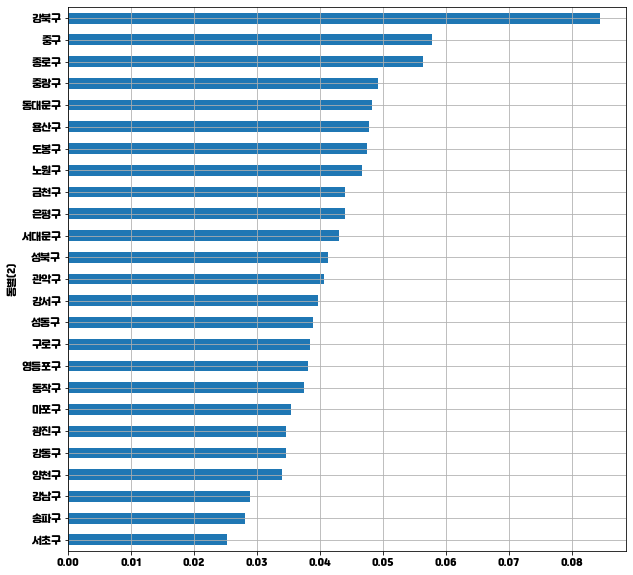

In [43]:
df1['독거노인'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))

<AxesSubplot:ylabel='동별(2)'>

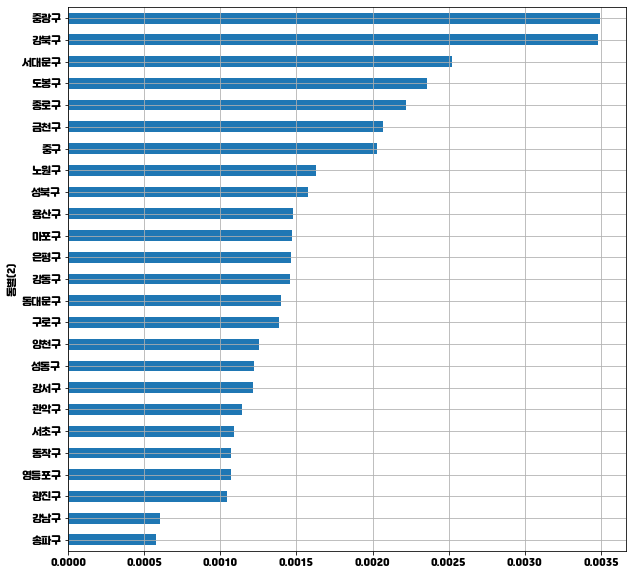

In [44]:
df1['저소득독거노인'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))

In [45]:
dfa

,배달 서비스 사용일수,배달_브랜드 서비스 사용일수,총인구수,1인가구수,1인가구수 비율,인구
종로구,0.033490,0.005844,136224.01,35254.56,0.258798,151999
중구,0.037153,0.005887,112428.22,29299.70,0.260608,130764
용산구,0.020768,0.003748,191233.63,43559.16,0.227780,233734
성동구,0.017956,0.003125,248869.41,47766.77,0.191935,288941
광진구,0.013888,0.002469,308130.65,72089.47,0.233957,351073
동대문구,0.012883,0.002331,304267.69,68411.59,0.224840,353181
중랑구,0.013656,0.002317,337194.69,59961.62,0.177825,391110
성북구,0.014398,0.002514,373924.02,65850.52,0.176107,442596
강북구,0.014555,0.002515,268277.30,48503.63,0.180797,298622
도봉구,0.014380,0.002587,279881.71,37107.68,0.132583,314884


In [46]:
dfb['저소득 독거노인의 비율']=df1['저소득독거노인']
dfb['독거노인의 비율']=df1['독거노인']
dfb

,휴일 총 이동 거리 합계,평균 통화대상자 수,휴일 총 이동 횟수 평균,인구,저소득 독거노인의 비율,독거노인의 비율
종로구,0.792103,0.042242,0.019197,136224.01,0.002217,0.056402
중구,0.871709,0.046992,0.020484,112428.22,0.002027,0.057761
용산구,0.550764,0.029149,0.013485,191233.63,0.001476,0.047789
성동구,0.438504,0.023051,0.010559,248869.41,0.001218,0.038870
광진구,0.314163,0.016050,0.007547,308130.65,0.001043,0.034634
동대문구,0.284898,0.015141,0.006922,304267.69,0.001396,0.048247
중랑구,0.291145,0.015275,0.007234,337194.69,0.003493,0.049244
성북구,0.325626,0.017480,0.008134,373924.02,0.001577,0.041178
강북구,0.280729,0.015055,0.007325,268277.30,0.003479,0.084371
도봉구,0.298809,0.015758,0.007658,279881.71,0.002360,0.047513


In [47]:
corr = dfb.corr()
corr

,휴일 총 이동 거리 합계,평균 통화대상자 수,휴일 총 이동 횟수 평균,인구,저소득 독거노인의 비율,독거노인의 비율
휴일 총 이동 거리 합계,1.000000,0.998373,0.996685,-0.687936,0.104335,0.278226
평균 통화대상자 수,0.998373,1.000000,0.998752,-0.700631,0.126386,0.298554
휴일 총 이동 횟수 평균,0.996685,0.998752,1.000000,-0.703152,0.137905,0.303739
인구,-0.687936,-0.700631,-0.703152,1.000000,-0.483606,-0.513519
저소득 독거노인의 비율,0.104335,0.126386,0.137905,-0.483606,1.000000,0.782654
독거노인의 비율,0.278226,0.298554,0.303739,-0.513519,0.782654,1.000000


In [48]:
df3=pd.read_csv('data/서울시 응급실 위치 정보.csv', encoding= 'cp949')
df3

,기관ID,주소,병원분류,병원분류명,응급의료기관코드,응급의료기관코드명,응급실운영여부,비고,기관설명상세,간이약도,...,진료시간(목요일)S,진료시간(금요일)S,진료시간(토요일)S,진료시간(일요일)S,진료시간(공휴일)S,우편번호1,우편번호2,병원경도,병원위도,작업시간
0,A1100008,"서울특별시 성북구 고려대로 73, 고려대병원 (안암동5가)",A,종합병원,G001,권역응급의료센터,1,"토요일 2,5째 휴무","건강검진센터, 내과진료만 가능",지하철 6호선 안암역 하차 후 1번출구 도보 500m,...,900,900,900,900,900,28,41,127.026471,37.587156,2023-03-07 14:55:24.0
1,A1100011,"서울특별시 영등포구 63로 10, 여의도성모병원 (여의도동)",A,종합병원,G006,지역응급의료센터,1,점심시간 13:00~14:00,저희 치과는 임플란트 보철 사랑니수술 등 치아에 관련된 모든 치료가능합니다(교정과도...,샛강역 3번 출구,...,900,900,900,1000,900,73,45,126.936731,37.518272,2023-03-07 14:55:24.0
2,A1121013,서울특별시 은평구 통일로 1021 (진관동),A,종합병원,G006,지역응급의료센터,1,점심시간 13:00~14:00,저희 치과는 임플란트 보철 사랑니수술 등 치아에 관련된 모든 치료가능합니다(교정과도...,샛강역 3번 출구,...,830,830,830,1000,900,33,12,126.916150,37.633608,2023-03-07 14:55:24.0
3,A1100047,서울특별시 관악구 관악로 242 (봉천동),B,병원,G009,응급실운영신고기관,1,"접수는 평일 16시, 토요일은 12시전까지만 가능합니다. 공휴일은 요일에 맞춰 진...",화요일 야간진료 예약시 21시까지,서울대입구역 7번 출구 도보 5분,...,900,900,900,900,900,87,35,126.956781,37.485618,2023-03-07 14:55:24.0
4,A1100076,"서울특별시 관악구 남부순환로 1449, 강남힐병원 (신림동)",B,병원,G009,응급실운영신고기관,1,점심시간 12:30~13:30,관악구 봉천동 187병상 투석 가능한 요양병원입니다.,2호선 신대방역/난곡사거리 인근,...,900,900,900,1030,900,87,67,126.911708,37.481585,2023-03-07 14:55:25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,A1100038,"서울특별시 영등포구 버드나루로7길 12 (영등포동7가, 한강성심병원)",A,종합병원,G009,응급실운영신고기관,1,진료과에따라 상이함(연락 후 내원 바람),점심 12:30~13:30,서울특별시 영등포구 버드나루로7길 12 (영등포동 7가 94-200),...,900,900,830,1000,1000,72,47,126.910330,37.523467,2023-03-07 14:55:52.0
63,A1100013,서울특별시 성동구 왕십리로 222-1 (사근동),A,종합병원,G001,권역응급의료센터,1,점심시간: 13시~14시,관절염/류마티스 전문/,한양대역 1번 출구,...,900,900,900,900,900,47,63,127.044883,37.559945,2023-03-07 14:55:53.0
64,A1100051,서울특별시 광진구 자양로 85 (자양동),A,종합병원,G007,지역응급의료기관,1,점심시간 13:00~14:00,24시간 전문의 진료가 가능한 서울 동북부 지역 거점병원입니다.,2호선 구의역 4번출구 직진방향 5분 거리,...,830,830,830,900,900,50,56,127.083601,37.535316,2023-03-07 14:55:53.0
65,A1100019,"서울특별시 양천구 목동로 225, 홍익병원본관 (신정동)",A,종합병원,G007,지역응급의료기관,1,평일 30분전 접수마감 토요일 13시 접수마감,후두내시경O/수액처치O,목동역 2번 출구,...,900,900,900,930,900,79,37,126.863664,37.528441,2023-03-07 14:55:54.0


In [49]:
dic={}
cnt=0
for i in x:
    cnt=0
    for j in df3.index:
        if i in df3.loc[j, '주소']:
            cnt+=1
    dic[i]=cnt
dic

{'종로구': 4,
 '중구': 2,
 '용산구': 1,
 '성동구': 2,
 '광진구': 2,
 '동대문구': 4,
 '중랑구': 3,
 '성북구': 1,
 '강북구': 3,
 '도봉구': 1,
 '노원구': 3,
 '은평구': 3,
 '서대문구': 2,
 '마포구': 1,
 '양천구': 3,
 '강서구': 4,
 '구로구': 2,
 '금천구': 1,
 '영등포구': 9,
 '동작구': 2,
 '관악구': 4,
 '서초구': 1,
 '강남구': 4,
 '송파구': 2,
 '강동구': 3}

In [50]:
df4 = pd.Series(dic)
df4=pd.DataFrame(df4, columns=['응급실'])
df4

,응급실
종로구,4
중구,2
용산구,1
성동구,2
광진구,2
동대문구,4
중랑구,3
성북구,1
강북구,3
도봉구,1


In [51]:
df5=pd.read_csv('data/시내주요기관(경찰·소방관서).csv')
df5=df5.set_index(df5['자치구별(2)'])
df5

,자치구별(1),자치구별(2),1988,1988.1,1988.2,1988.3,1989,1989.1,1989.2,1989.3,...,2020.2,2020.3,2020.4,2020.5,2021,2021.1,2021.2,2021.3,2021.4,2021.5
자치구별(2),,,,,,,,,,,,,,,,,,,,,
자치구별(2),자치구별(1),자치구별(2),경찰서,지구대파출소치안센터,소방서,119안전센터,경찰서,지구대파출소치안센터,소방서,119안전센터,...,지구대파출소치안센터,소방본부,소방서,119안전센터,경찰청,경찰서,지구대파출소치안센터,소방본부,소방서,119안전센터
소계,합계,소계,25,567,13,71,25,574,14,77,...,408,1,24,119,2,31,407,1,25,119
종로구,합계,종로구,2,40,1,4,2,40,1,5,...,22,-,1,6,1,2,22,0,1,6
중구,합계,중구,2,43,1,3,2,43,1,3,...,18,1,1,5,0,2,18,1,1,5
용산구,합계,용산구,1,29,1,4,1,29,1,4,...,12,-,1,5,0,1,12,0,1,5
성동구,합계,성동구,2,41,1,5,2,41,1,5,...,15,-,1,4,0,1,15,0,1,4
광진구,합계,광진구,-,-,-,-,-,-,-,-,...,12,-,1,3,0,1,12,0,1,3
동대문구,합계,동대문구,1,34,1,3,1,34,1,3,...,20,-,1,5,0,1,20,0,1,5
중랑구,합계,중랑구,1,17,-,3,1,17,-,3,...,17,-,1,4,0,1,17,0,1,4


In [52]:
df5=df5.iloc[1:,186:187]
df5.columns=['지구대파출소치안센터']
df5

,지구대파출소치안센터
자치구별(2),
소계,407
종로구,22
중구,18
용산구,12
성동구,15
광진구,12
동대문구,20
중랑구,17
성북구,24


In [53]:
df4['지구대파출소치안센터']=df5['지구대파출소치안센터']
df4['1인가구수']=dfa['1인가구수']
df4['지구대파출소치안센터']=df4['지구대파출소치안센터'].astype(float)
df4.dtypes

응급실             int64
지구대파출소치안센터    float64
1인가구수         float64
dtype: object

In [54]:
df4['1인가구당 응급실']=df4['응급실']/df4['1인가구수']
df4['1인가구당 지구대파출소치안센터']=df4['지구대파출소치안센터']/df4['1인가구수']
df4.sort_values(by='1인가구당 응급실')

,응급실,지구대파출소치안센터,1인가구수,1인가구당 응급실,1인가구당 지구대파출소치안센터
마포구,1,15.0,70558.84,0.000014,0.000213
성북구,1,24.0,65850.52,0.000015,0.000364
서초구,1,19.0,48100.43,0.000021,0.000395
금천구,1,12.0,45343.01,0.000022,0.000265
용산구,1,12.0,43559.16,0.000023,0.000275
송파구,2,21.0,79947.04,0.000025,0.000263
도봉구,1,9.0,37107.68,0.000027,0.000243
광진구,2,12.0,72089.47,0.000028,0.000166
관악구,4,18.0,140447.33,0.000028,0.000128
동작구,2,17.0,69772.56,0.000029,0.000244


In [55]:
df4.sort_values(by='1인가구당 지구대파출소치안센터')

,응급실,지구대파출소치안센터,1인가구수,1인가구당 응급실,1인가구당 지구대파출소치안센터
관악구,4,18.0,140447.33,0.000028,0.000128
강서구,4,12.0,83887.16,0.000048,0.000143
광진구,2,12.0,72089.47,0.000028,0.000166
서대문구,2,10.0,51298.52,0.000039,0.000195
영등포구,9,15.0,73849.38,0.000122,0.000203
마포구,1,15.0,70558.84,0.000014,0.000213
도봉구,1,9.0,37107.68,0.000027,0.000243
동작구,2,17.0,69772.56,0.000029,0.000244
강남구,4,21.0,83017.11,0.000048,0.000253
송파구,2,21.0,79947.04,0.000025,0.000263


In [56]:
# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], 
                        zoom_start=12)

# 대학교 위치정보를 Marker로 표시
for name, lat, lng in zip(df.index, df3.병원위도, df3.병원경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)
seoul_map